In [1]:
#Time series forecast using ARIMA for prediction of wheat yield in uttar pradesh using historical data

In [2]:
import numpy as np
import pandas as pd
from pandas import Series
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import math
import csv
import json
import os
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

In [3]:
YieldDf=pd.read_csv("Data_Set1.csv",parse_dates=["Year"], index_col="Year")
YieldDf.head(20)

,Production
Year,
1960-01-01,10320
1961-01-01,10995
1962-01-01,12076
1963-01-01,10779
1964-01-01,9854
1965-01-01,12258
1966-01-01,10394
1967-01-01,11393
1968-01-01,16540


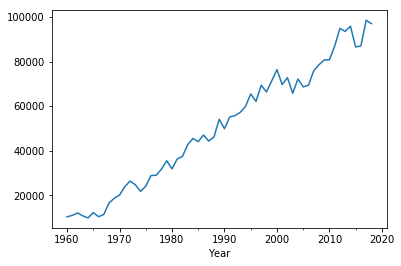

In [4]:
YieldDf["Production"].plot()

In [5]:
prodmax = YieldDf['Production'].max()
prodmax

98510

In [6]:
YieldDf['Production'] = YieldDf.apply( lambda x: x['Production']/prodmax,axis=1)
YieldDf.head(3)

,Production
Year,
1960-01-01,0.104761
1961-01-01,0.111613
1962-01-01,0.122587


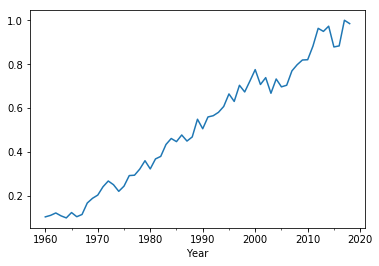

In [7]:
YieldDf["Production"].plot()

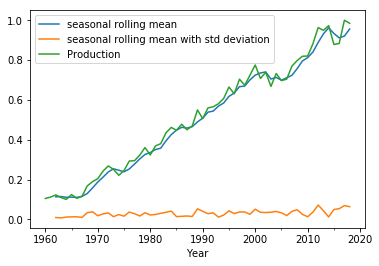

In [8]:
YieldDf["Production"].rolling(3).mean().plot(label='seasonal rolling mean')
YieldDf["Production"].rolling(3).std().plot(label='seasonal rolling mean with std deviation')
YieldDf["Production"].plot()
plt.legend()

In [9]:
YieldDataForADFC = pd.read_csv("Data_Set1.csv")
YieldDataForADFC =YieldDataForADFC.set_index('Year')
DickyFullerStats = adfuller(list(YieldDataForADFC['Production']))
print(' Statistic Value = ',DickyFullerStats[0],'\n','5% Critical Value = ',DickyFullerStats[4]['5%'])

 Statistic Value =  0.15403572858716105 
 5% Critical Value =  -2.9167703434435808


In [10]:
if DickyFullerStats[0]> DickyFullerStats[4]['5%']:
    print ('Time series is not stationary')
else:
    print ('time series is stationary')

Time series is not stationary


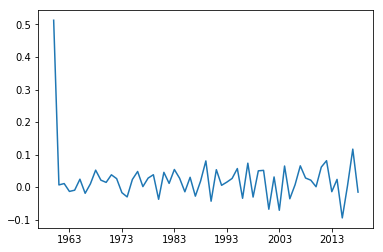

In [11]:
FirstOrderdif=YieldDf.diff().fillna(YieldDf['Production'].mean())
plt.plot(FirstOrderdif)

In [12]:
FirstDifResult = adfuller(list(FirstOrderdif['Production']))
print('Statistic Value= ',FirstDifResult[0],'\n','5% Critical Value = ',FirstDifResult[4]['5%'])
if FirstDifResult[0]> FirstDifResult[4]['5%']:
    print ('Time series is not stationary')
else:
    print ('Time series is stationary')

Statistic Value=  -5.399632613100406 
 5% Critical Value =  -2.9157312396694217
Time series is stationary


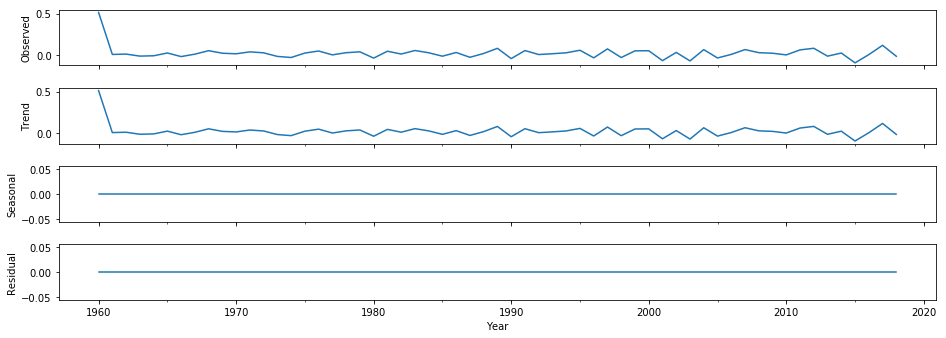

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
DecompositionValues=seasonal_decompose(FirstOrderdif,model='add',filt=None,freq=1,two_sided=True)
DecompositionValues.plot().set_size_inches( 15,5)

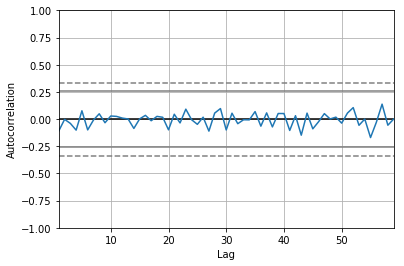

In [14]:
AutoResampledDif = FirstOrderdif.resample('AS').mean()
autocorrelation_plot(AutoResampledDif)
pyplot.show()

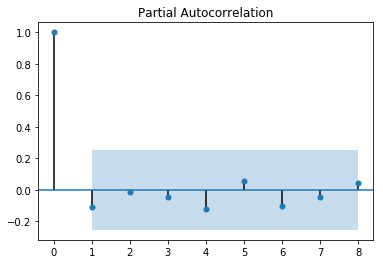

In [15]:
PartialAC=plot_pacf(AutoResampledDif,lags=8)

In [16]:
YieldModel = ARIMA(FirstOrderdif,order=(5,0,1))
FitModel=YieldModel.fit()
print(FitModel.summary())

                              ARMA Model Results                              
Dep. Variable:             Production   No. Observations:                   59
Model:                     ARMA(5, 1)   Log Likelihood                  72.297
Method:                       css-mle   S.D. of innovations              0.070
Date:                Thu, 13 Dec 2018   AIC                           -128.594
Time:                        10:05:13   BIC                           -111.974
Sample:                    01-01-1960   HQIC                          -122.106
                         - 01-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.004      4.793      0.000       0.011       0.027
ar.L1.Production    -0.8764      1.254     -0.699      0.488      -3.334       1.581
ar.L2.Production    -0.4283 

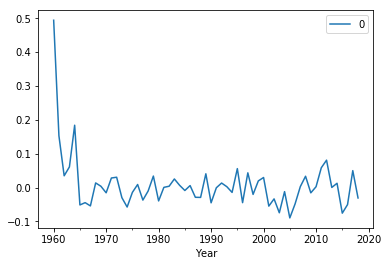

In [17]:
residuals=DataFrame(FitModel.resid)
residuals.plot()

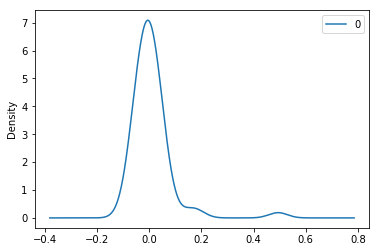

In [18]:
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

In [19]:
print(residuals.describe())

               0
count  59.000000
mean    0.008386
std     0.080883
min    -0.089855
25%    -0.032260
50%     0.000424
75%     0.028810
max     0.494158


In [20]:
df=pd.read_csv("Data_Set1.csv",parse_dates=["Year"], index_col="Year")
df.head()

,Production
Year,
1960-01-01,10320
1961-01-01,10995
1962-01-01,12076
1963-01-01,10779
1964-01-01,9854


In [21]:
series=df.copy()
prodmax = series['Production'].max()
series['Production'] = series.apply( lambda x: x['Production']/prodmax,axis=1)
X = series.values
Y = series.index
size=int(len(X)*0.85)
train, test=X[0:size], X[size:len(X)]
ytrain, ytest=Y[0:size], Y[size:len(X)]
SizeOfTestData = len(test)
prodmax

98510

In [22]:
ArimaModel=ARIMA(train,order=(4,1,1))
FittedArimaModel=ArimaModel.fit()
forecast = FittedArimaModel.forecast(SizeOfTestData)[0]

In [23]:
prediction = list()
for i in range (SizeOfTestData):
    prediction.append(forecast[i]*prodmax)
    print('Predicted=%.2f expected=%.0f' %(forecast[i]*prodmax,test[i]*prodmax))

Predicted=84358.42 expected=80804
Predicted=85535.84 expected=86874
Predicted=87422.31 expected=94882
Predicted=88832.29 expected=93506
Predicted=89842.39 expected=95850
Predicted=91251.03 expected=86530
Predicted=92445.42 expected=87000
Predicted=93842.37 expected=98510
Predicted=95355.16 expected=97000


In [24]:
testsum = test.sum()
forecastsum = forecast.sum()
error=mean_squared_error(test,forecast)
print('Test RMSE:%.3f' % math.sqrt(error))

Test RMSE:0.048


In [25]:
error_per=(abs(testsum-forecastsum)/testsum)*100
print (error_per,"%")

1.4703308187626476 %


In [26]:
dz = pd.DataFrame({"Yield":prediction})
dz = dz.set_index('Yield')
dz.to_csv('file_path1.csv')

In [27]:
dfz=pd.read_csv("file_path1.csv")

In [28]:
def plotRegression(xTest,yTest, regressor):
    traceTest = go.Bar(
        y = xTest,
        x = yTest,
        name = 'Testing Line'
    )

    tracePred = go.Bar(
        y = regressor, 
        x = yTest,
        name = 'Prediction Line'
    )
    
    data = [traceTest, tracePred]
    layout = dict(
        title = 'Model',
        xaxis = dict(
                title = 'Year'
        ),
        yaxis = dict(
            title = 'Yield(MT)'
        ),
    )
    
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)

In [29]:
train, test=df['Production'][0:size], df['Production'][size:len(X)]
ytrain, ytest=Y[0:size], Y[size:len(X)]

In [30]:
plotRegression(test,ytest, prediction)